In [1]:
using PyPlot

# Tarea 1

Fecha de envío del PR inicial: **26 de febrero**

Fecha de aceptación del PR: **12 de marzo**


## 1. Raíces de una ecuación de segundo grado

Implementen en julia una función que devuelva las raíces de una ecuación de segundo grado general con coeficientes reales. La función debe ser estable según el tipo ([type-stable](http://docs.julialang.org/en/release-0.5/manual/faq/?highlight=type%20stability#what-does-type-stable-mean)), lo que significa que el tipo del resultado sólamente depende del tipo de las entradas. En particular, muestren que su función devuelve raíces consistentes para $a=1$, $b=1$, $c=10^{-17}$.

La función debe estar documentada de manera apropiada, lo que significa que, al correr el Jupyter notebook de su tarea, la instrucción
```julia
? nombre_funcion
```
debe dar información apropiada.

Incluyan cualquier comentario prudente del algoritmo que usan, ya sea en el notebook (usando markdown) o en la propia función incluyendo comentarios.


In [2]:
doc"""
raices(a,b,c)

Esta funcion calcula las raices de un polinomio de segundo grado de la forma

\$ax^2 + bx + c = 0\$

con a, b y c reales utilizando

\$ x_{+-} = \frac{-b \pm \sqrt{b^2-4ac}}{2a}\$


El algoritmo evalua el discriminante $\Delta = b^2-4ac$ y hace los calculos necesarios:
1. si $\Delta = 0$ la funcion regresa $\frac{-b}{2a}$
2. si $\Delta < 0$ la funcion regresa el comentario "La funcion no tiene raices reales"
3. si $\Delta > 0$ la funcion regresa $X_{+}, X_{-}$
"""

function raices(a,b,c)
    
    if a == 0
        
        println("El polinomio no es de segundo grado.")
        return
        
    end
    
    det = b^2 - 4 * a * c
    
    if det < 0
        println(typeof(det))
        println("El polinomio no tiene raices reales.")
        return
        
    elseif det == 0
        println(typeof(det))
        return /(-b , (2 * a)), /(-b , (2 * a))
    
    else
        println(typeof(det))
        return /(-b + sqrt(det), 2 * a), /(-b - sqrt(det), 2 * a)
   
    end
end

raices

In [3]:
@code_warntype(raices(1,2,1))

Variables:
  #self#::#raices
  a::Int64
  b::Int64
  c::Int64
  det::Int64

Body:
  begin 
      NewvarNode(:(det::Int64))
      unless (a::Int64 === 0)::Bool goto 10 # line 23:
      # meta: location coreio.jl println 5
      SSAValue(0) = (Core.typeassert)(Base.STDOUT,Base.IO)::IO
      # meta: pop location
      (Base.print)(SSAValue(0),"El polinomio no es de segundo grado.",'\n')::Void # line 24:
      return
      10:  # line 28:
      det::Int64 = (Base.box)(Int64,(Base.sub_int)((Base.box)(Int64,(Base.mul_int)(b::Int64,b::Int64)),(Base.box)(Int64,(Base.mul_int)((Base.box)(Int64,(Base.mul_int)(4,a::Int64)),c::Int64)))) # line 30:
      unless (Base.slt_int)(det::Int64,0)::Bool goto 27 # line 31:
      # meta: location coreio.jl println 5
      SSAValue(1) = (Core.typeassert)(Base.STDOUT,Base.IO)::IO
      # meta: pop location
      (Base.print)(SSAValue(1),Int64,'\n')::Void # line 32:
      # meta: location coreio.jl println 5
      SSAValue(2) = (Core.typeassert)(Base.STDOUT,Base

In [4]:
? raices

search: RandomDevice



raices(a,b,c)

Esta funcion calcula las raices de un polinomio de segundo grado de la forma

$ax^2 + bx + c = 0$

con a, b y c reales utilizando

$ x_{+-} = \frac{-b \pm \sqrt{b^2-4ac}}{2a}$

El algoritmo evalua el discriminante $\Delta = b^2-4ac$ y hace los calculos necesarios:

1. si $\Delta = 0$ la funcion regresa $\frac{-b}{2a}$
2. si $\Delta < 0$ la funcion regresa el comentario "La funcion no tiene raices reales"
3. si $\Delta > 0$ la funcion regresa $X_{+}, X_{-}$


In [5]:
ints = [1,2,1]
x = raices(ints...)
println(x)
println(typeof(ints))
println(typeof(x))

Int64
(-1.0,-1.0)
Array{Int64,1}
Tuple{Float64,Float64}


In [6]:
abc = (1,1,1e-17)
x = raices(abc...)
println(x)
println(typeof(x))
println(typeof(abc))

Float64
(0.0,-1.0)
Tuple{Float64,Float64}
Tuple{Int64,Int64,Float64}


## 2. Promedio y varianza

(a) Escriban dos funciones (`promedio` y `varianza`) que calculen el promedio y la varianza de un vector de datos.

In [7]:
doc"""
promedio(arreglo)

Funcion que calcula el promedio aritmetico de los elementos de un arreglo utilizando

$\bar{x} = \frac{1}{n} \sum_{1}^{n} x_i$

"""

function promedio(arreglo)

    n = length(arreglo)
    promedio = 0.0
    
    for num = arreglo
        promedio += num
    end
    
    promedio /= n 
    
    return promedio
end

promedio(rand(2^20))  # llamamos a la funcion para que la compile.

0.4996311731083297

In [8]:
doc"""
varianza(arreglo)

Funcion que calcula la varianza de los elementos de un arreglo utilizando

$ \sigma = (\frac{1}{n} \sum_{1}^{n} x_{i}^{2}) - \bar{x}^{2} $

"""

function varianza(arreglo)
    n = length(arreglo)
    p = promedio(arreglo)
    σ = 0.0
    
    for num = arreglo
        σ += (num - p)^2 
    end
    
    σ /= n
    return σ
end

varianza(randn(1000))  # llamamos a la funcion para que la compile.

1.0534954068502114

(b) Comparen su resultado con lo que se obtiene al utilizar `mean` y `var`, que son las funciones nativas de Julia que hacen eso. En particular, consideren el siguiente vector de datos
```julia
v = 1.0e7 + randn(10^8)
```
¿Qué hace la función `randn(10^8)`?

La funcion randn(n) genera un arreglo de longitud n de valores aleatorios con distribucion normal de varianza 1.

In [9]:
v = 1.0e7 + randn(10^6);

In [10]:
p, m = promedio(v), mean(v)

(1.0000000002297128e7,1.0000000002296923e7)

In [11]:
t_mine_prom = @elapsed promedio(v)
t_native_prom = @elapsed mean(v)

println("timepo de promedio = ", t_mine_prom)
println("timepo de mean = ", t_native_prom)
println(100 * t_mine_prom / t_native_prom, "% mas lento")

timepo de promedio = 0.001346922
timepo de mean = 0.000675608
199.36442434074195% mas lento


In [12]:
vf, vn = varianza(v), var(v)

(0.9992159121194417,0.9992169113362976)

In [13]:
t_mine_vari = @elapsed varianza(v)
t_native_vari = @elapsed var(v)

println("timepo de varianza = ", t_mine_vari)
println("timepo de var = ", t_native_vari)
println(100 * t_mine_vari / t_native_vari, "% mas lento")

timepo de varianza = 0.002356832
timepo de var = 0.00073112
322.3591202538571% mas lento


(c) Implementen el [algoritmo recursivo](https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm), ampliamente desconocido, que  calcula el promedio (`promedio_rec`) y la varianza (`varianza_rec`) con una sóla lectura de los datos. Usen sus fuciones en el vector anterior y comparen sus resultados con los obtenidos en (a).

In [46]:
doc"""
prom_var_rec(arreglo)

regresa un arreglo con (promedio, varianza)

Funcion que calcula el promedio y la varianza con una sola lectura de los datos implementando el algoritmo recursivo encontrado [aqui](https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm).
"""

function prom_var_rec(arreglo)
    n = 0.0
    promedio = 0.0
    M2 = 0.0
    varianza = 0.0
    
    for x = arreglo
        n += 1.0
        delta = x - promedio
        promedio += delta / n
        delta2 = x - promedio
        M2 += delta * delta2
    end   
    
    varianza = M2 / (n-1.0)
     
    return promedio, varianza 
end

prom_var_rec(randn(1000000)) # llamamos a la funcion para que la compile.

(4.362979791020066e-5,0.9986510154682767)

In [15]:
?prom_var_rec

search:



prom_var_rec(arreglo)

regresa un arreglo con (promedio, varianza)

Funcion que calcula el promedio y la varianza con una sola lectura de los datos implementando el algoritmo recursivo encontrado [aqui](https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm).


In [16]:
t_rec = @elapsed prom_var_rec(v)

0.007968492

In [17]:
prom_rec, var_rec = prom_var_rec(v)

(1.000000000229688e7,0.9992169118365067)

In [18]:
println("funcion promedio ", p)
println("funcion mean     ", m)
println("funcion prom_rec ", prom_rec)

funcion promedio 1.0000000002297128e7
funcion mean     1.0000000002296923e7
funcion prom_rec 1.000000000229688e7


In [19]:
println("funcion varianza ", vf)
println("funcion var      ", vn)
println("funcion var_rec  ", var_rec)

funcion varianza 0.9992159121194417
funcion var      0.9992169113362976
funcion var_rec  0.9992169118365067


(d) ¿Cuál de todos los algoritmos es el más rápido? (Pueden usar `@time` o `@elapsed`.) Usen vectores de varias longitudes, que cubran varios órdenes de magnitud.

In [72]:
n = 27
tiempos_pro = zeros(n)
tiempos_nat = zeros(n)
tiempos_rec = zeros(n)

for i = 1:n
    l = 1e4 + randn(2^i)
    
    tiempos_rec[i] = @elapsed prom_var_rec(l)
    tiempos_pro[i] = @elapsed promedio(l), varianza(l)
    tiempos_nat[i] = @elapsed mean(l), var(l)
    
#     println(prom_var_rec(l)[1])
#     println(promedio(l))
#     println(mean(l))
end

log_rec = log(tiempos_rec)
log_pro = log(tiempos_pro)
log_nat = log(tiempos_nat);

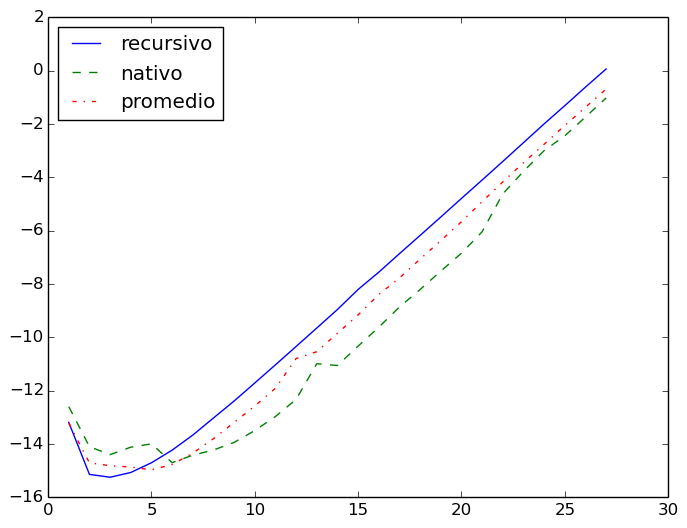

PyObject <matplotlib.legend.Legend object at 0x7f21bf0d8950>

In [73]:
plot(1:n, log_rec,  linestyle = "-",  label = "recursivo")
plot(1:n, log_nat,  linestyle = "--", label = "nativo")
plot(1:n, log_pro,  linestyle = "-.", label = "promedio")
legend(loc="best")

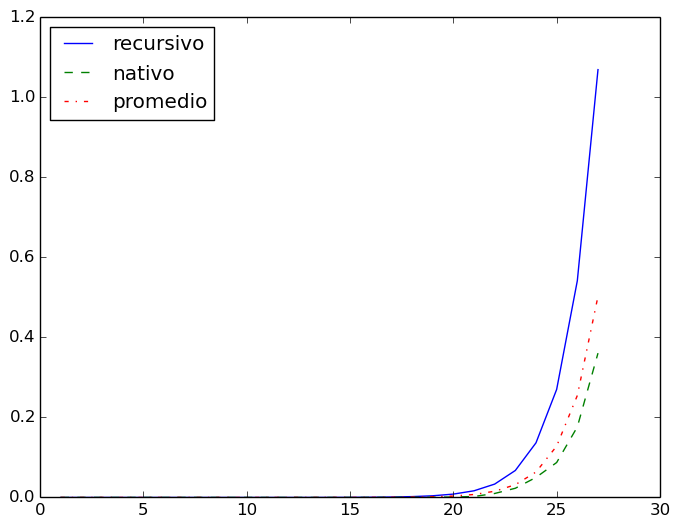

PyObject <matplotlib.legend.Legend object at 0x7f21befbad10>

In [74]:
plot(1:n, tiempos_rec,   linestyle = "-", label = "recursivo")
plot(1:n, tiempos_nat,  linestyle = "--", label = "nativo")
plot(1:n, tiempos_pro,  linestyle = "-.", label = "promedio")
legend(loc="best")

## 3. Método de Simpson para integrar $f(x)$ en un intervalo dado

Implementen el método de Simpson para integrar una función arbitraria $f(x)$.